In [4]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor

In [5]:
print(torch.__version__)
print(torchvision.__version__)

2.7.1+cu126
0.22.1+cu126


In [6]:
#getting the dataset(FashionMNIST)
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform = ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform = ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:13<00:00, 2.02MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 145kB/s]
100%|██████████| 4.42M/4.42M [00:02<00:00, 1.98MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 553kB/s]


In [7]:
len(train_data), len(test_data)

(60000, 10000)

In [8]:
#see first training example
label,image = train_data[0]
print(f"Label: {label}")


Label: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 

In [9]:
class_names= train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [47]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

Text(0.5, 1.0, 'Ankle boot')

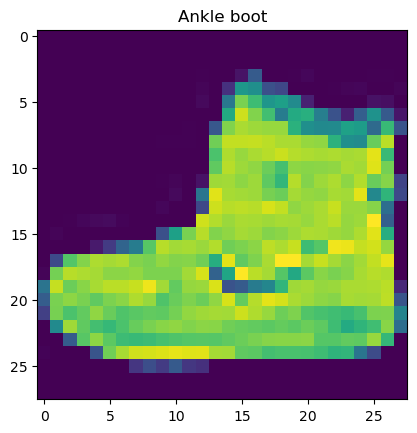

In [52]:
#visualizing the data
import matplotlib.pyplot as plt
image,label = train_data[0]
plt.imshow(image.squeeze())
plt.title(class_names[label])

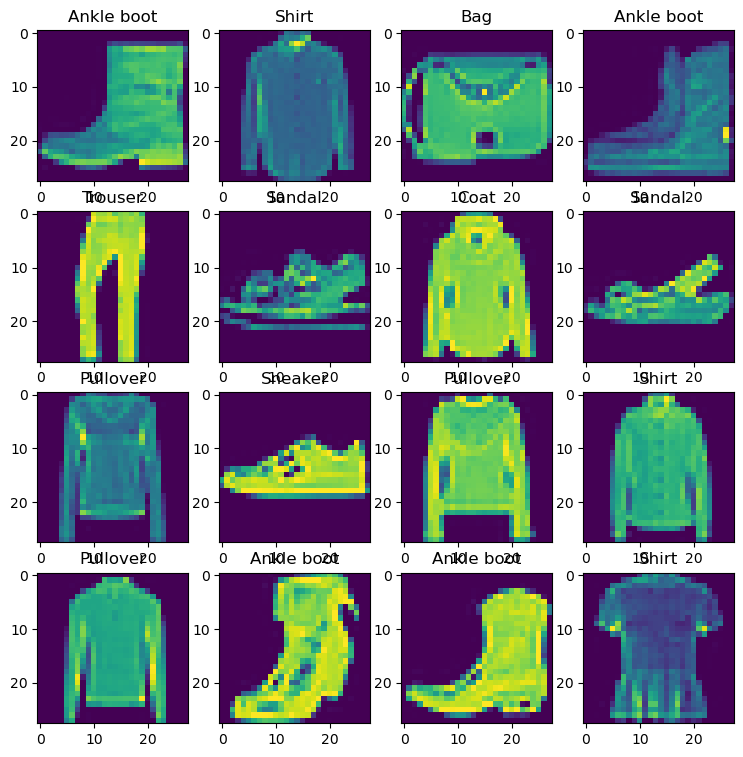

In [55]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,colums = 4,4
for i in range(1,rows*colums+1):
    rand_int = torch.randint(0,len(train_data),size=(1,)).item()
    img,label = train_data[rand_int]
    fig.add_subplot(rows,colums,i)
    plt.imshow(img.squeeze())
    plt.title(class_names[label])

In [58]:
#data loader and understand the batches
from torch.utils.data import DataLoader
train_loader = DataLoader(
    dataset=train_data,
    batch_size=32,
    shuffle=True
)
test_loader = DataLoader(
    dataset=test_data,
    batch_size=32,
    shuffle=False
)
train_loader,test_loader


(<torch.utils.data.dataloader.DataLoader at 0x7fba9a59c050>,
 <torch.utils.data.dataloader.DataLoader at 0x7fba9a59c190>)

In [60]:
len(train_data),len(train_loader),len(test_data),len(test_loader)

(60000, 1875, 10000, 313)

In [61]:
train_loader.batch_size,test_loader.batch_size

(32, 32)

In [62]:
#whats inside the data loader
train_batch,test_batch = next(iter(train_loader))
train_batch.shape,test_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [64]:
#create a baseline model of cv
flatten_model = nn.Flatten()
x = train_batch[0]
output = flatten_model(x)
output,output.shape

(tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
          0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.2863

In [65]:
class model1(nn.Module):
    def __init__(self,input_shape:int,hidden:int,output_shape:int):
        super().__init__()
        self.layerstack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape,hidden),
            nn.Linear(hidden,output_shape)
            
        )
    def forward(self,x):
        return self.layerstack(x)

In [66]:
torch.manual_seed(42)
model = model1(
    input_shape=784,
    hidden=10,
    output_shape=len(class_names)
)
model


model1(
  (layerstack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [67]:
model.state_dict()

OrderedDict([('layerstack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layerstack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layerstack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.313

In [79]:
#setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.1)

In [80]:
#creating a training loop and training a model on batch of data
from tqdm.auto import tqdm
torch.manual_seed(42)
epochs =3
for epoch in tqdm(range(epochs)):
    print(f"epoch:{epoch}\n---")
    train_loss = 0
    
    #add a loop to loop through the training batches
    for batch,(x,y) in enumerate(train_loader):
        model.train()
        y_pred = model(x)
        loss_val = loss_fn(y_pred, y)  # use `loss_fn` or your actual loss function name
        train_loss += loss_val.item()
        optimizer.zero_grad()
        loss_val.backward()
        optimizer.step()

      
        
        
        if batch % 400 == 0:
            print(f"looked at {batch*len(x)}/{len(train_loader.dataset)} samples..")
#divide train loss by length of train dataloader
            train_loss /=len(train_loader)
         #testing
            test_loss = 0
            model.eval()
            for xtest,ytest in test_loader:
                #forward pass
                test_pred = model(xtest)
                
                test_loss += loss_fn(test_pred,ytest)
                test_loss/=len(test_loader)
            print(f"train loss:{train_loss:.5f} | test loss:{test_loss:.5f}")
         

  0%|          | 0/3 [00:00<?, ?it/s]

epoch:0
---
looked at 0/60000 samples..
train loss:0.00115 | test loss:0.00773
looked at 12800/60000 samples..
train loss:0.16746 | test loss:0.00123
looked at 25600/60000 samples..
train loss:0.12345 | test loss:0.00117
looked at 38400/60000 samples..
train loss:0.11645 | test loss:0.00114
looked at 51200/60000 samples..
train loss:0.10875 | test loss:0.00095


 33%|███▎      | 1/3 [00:07<00:15,  7.67s/it]

epoch:1
---
looked at 0/60000 samples..
train loss:0.00030 | test loss:0.00094
looked at 12800/60000 samples..
train loss:0.10206 | test loss:0.00099
looked at 25600/60000 samples..
train loss:0.10532 | test loss:0.00086
looked at 38400/60000 samples..
train loss:0.10259 | test loss:0.00110
looked at 51200/60000 samples..
train loss:0.09920 | test loss:0.00109


 67%|██████▋   | 2/3 [00:16<00:08,  8.59s/it]

epoch:2
---
looked at 0/60000 samples..
train loss:0.00022 | test loss:0.00105
looked at 12800/60000 samples..
train loss:0.09824 | test loss:0.00104
looked at 25600/60000 samples..
train loss:0.09851 | test loss:0.00133
looked at 38400/60000 samples..
train loss:0.09756 | test loss:0.00120
looked at 51200/60000 samples..
train loss:0.09894 | test loss:0.00093


100%|██████████| 3/3 [00:27<00:00,  9.06s/it]


In [85]:
#make prediction and get result 
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module
            ):
    loss = 0
    correct = 0
    total = 0
    model.eval()
    with torch.inference_mode():
        for x,y in data_loader:
            y_pred = model(x)
            
            loss += loss_fn(y_pred,y)
            loss /=len(data_loader)
            pred_classes = y_pred.argmax(dim=1)
            correct += (pred_classes == y).sum().item()
            total += y.size(0)
            accuracy = correct / total * 100
            
        return {
        "model name": model.__class__.__name__,
        "model loss": loss,
        "model accuracy (%)": accuracy
          }

model_result = eval_model(
    model=model,
    data_loader=test_loader,
    loss_fn=loss_fn
)
model_result

{'model name': 'model1',
 'model loss': tensor(0.0011),
 'model accuracy (%)': 83.28}

In [86]:
torch.cuda.is_available()

True

In [87]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'